South Asia
Internet VS Working Age Population

## Load

In [179]:
import os
path = r'C:\Users\nadda\Desktop\KU\01204314-65-Statistics-for-Computer-Engineering-Applications\week10'
data_path = os.path.join(path, "data")
processed_data_path = os.path.join(path, "processed_data")
os.chdir(path)
os.getcwd()

'C:\\Users\\nadda\\Desktop\\KU\\01204314-65-Statistics-for-Computer-Engineering-Applications\\week10'

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from pandas.plotting import scatter_matrix

In [181]:
df_regions = pd.read_excel(os.path.join(data_path, "countries_regions.xlsx"))
df_regions.reset_index(inplace=True)

df_internet = pd.read_csv(os.path.join(processed_data_path, "internet.csv"))

df_work = pd.read_csv(os.path.join(processed_data_path, "pop_working_age.csv"))

South Asia
Western Asia
Southeast Asia
East Asia
North America
South America
Eastern Europe
Western Europe
Northern Europe
Australia and Oceanea
Africa
Middle East

In [182]:
# เลือกเฉพาะประเทศที่อยู่ในทวีปที่สนใจ
region = "South Asia"
region_countries = df_regions[df_regions["Region"] == region]["CountryName"].tolist()

# กรองเฉพาะคอลัมน์ GDP
columns_to_keep = ["Year"] + [country for country in region_countries if country in df_internet.columns]
df_internet = df_internet[columns_to_keep]

# กรองเฉพาะคอลัมน์ GDP
columns_to_keep = ["Year"] + [country for country in region_countries if country in df_work.columns]
df_work = df_work[columns_to_keep]

df_internet.head(20)
#df_work.head(20)

,Year,Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka
0,2001,0.000,0.03,0.30,0.00,0.07,0.00,0.01,0.00
1,2002,0.000,0.03,0.30,0.01,0.07,0.00,0.01,0.00
2,2003,0.000,0.03,0.30,0.01,0.17,0.00,0.01,0.02
3,2004,0.000,0.03,0.30,0.02,0.24,0.00,0.01,0.10
4,2005,0.000,0.03,0.30,0.12,1.06,0.00,0.01,0.10
5,2006,0.000,0.03,0.30,0.20,2.00,0.00,0.01,0.11
6,2007,0.000,0.03,0.30,0.26,3.21,0.04,0.02,0.31
7,2008,0.000,0.03,0.30,0.44,4.57,0.04,0.09,0.49
8,2009,0.000,0.21,0.49,0.63,4.42,0.06,0.20,0.82
9,2010,0.010,0.27,1.24,0.88,4.31,0.22,0.40,1.09


In [183]:
df_internet_ori = df_internet
df_work_ori = df_work

## Exploratory Data Analysis

### Find mean, median and SD for each year

In [184]:
def wide_to_long_format(df):
    return df.melt(id_vars=["Year"], var_name="CountryName", value_name="Value")

def compute_statistics(df):
    df = wide_to_long_format(df)
    
    # คำนวณค่าทางสถิติที่สำคัญสำหรับ EDA
    df = df.groupby(["Year"])["Value"].agg(["mean", "median", "min", "max", "var", "std", "count"]).reset_index()
    
    # เปลี่ยนชื่อคอลัมน์ให้อ่านง่าย
    df.columns = ["Year", "Mean", "Median", "Min", "Max", "Variance", "Std Dev", "Count"]
    
    return df

In [185]:
df_internet_region = compute_statistics(df_internet)
df_internet_region.head(20)

,Year,Mean,Median,Min,Max,Variance,Std Dev,Count
0,2001,0.051250,0.005,0.000,0.30,0.010698,0.103432,8
1,2002,0.052500,0.010,0.000,0.30,0.010564,0.102783,8
2,2003,0.067500,0.015,0.000,0.30,0.011993,0.109512,8
3,2004,0.087500,0.025,0.000,0.30,0.013964,0.118171,8
4,2005,0.202500,0.065,0.000,1.06,0.130136,0.360743,8
5,2006,0.331250,0.070,0.000,2.00,0.466470,0.682986,8
6,2007,0.521250,0.150,0.000,3.21,1.198155,1.094603,8
7,2008,0.745000,0.195,0.000,4.57,2.425571,1.557425,8
8,2009,0.853750,0.350,0.000,4.42,2.157484,1.468838,8
9,2010,1.052500,0.640,0.010,4.31,1.927936,1.388501,8


In [186]:
df_work_region = compute_statistics(df_work)
df_work_region.head(20)

,Year,Mean,Median,Min,Max,Variance,Std Dev,Count
0,2001,57.53125,58.040,47.85,66.32,28.664098,5.353886,8
1,2002,57.96000,59.070,47.77,66.52,29.813057,5.460133,8
2,2003,58.39125,60.075,47.74,66.66,31.113784,5.577973,8
3,2004,58.85375,60.725,47.78,66.78,32.503455,5.701180,8
4,2005,59.34750,61.340,48.09,66.87,33.262250,5.767343,8
5,2006,59.84375,61.700,48.47,66.93,34.073570,5.837257,8
6,2007,60.24625,62.015,48.00,66.95,38.253741,6.184961,8
7,2008,60.66625,62.325,47.79,67.41,41.973741,6.478714,8
8,2009,61.15875,62.660,48.35,68.74,42.735241,6.537220,8
9,2010,61.60750,63.065,48.68,69.85,44.075707,6.638954,8


### Boxplot

In [187]:
val1 = "Fixed broadband subscriptions (per 100 people)"
val2 = "Population ages 15-64 (% of total population)"

In [188]:
df_internet

,Year,Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka
0,2001,0.000,0.03,0.30,0.00,0.07,0.00,0.01,0.00
1,2002,0.000,0.03,0.30,0.01,0.07,0.00,0.01,0.00
2,2003,0.000,0.03,0.30,0.01,0.17,0.00,0.01,0.02
3,2004,0.000,0.03,0.30,0.02,0.24,0.00,0.01,0.10
4,2005,0.000,0.03,0.30,0.12,1.06,0.00,0.01,0.10
5,2006,0.000,0.03,0.30,0.20,2.00,0.00,0.01,0.11
6,2007,0.000,0.03,0.30,0.26,3.21,0.04,0.02,0.31
7,2008,0.000,0.03,0.30,0.44,4.57,0.04,0.09,0.49
8,2009,0.000,0.21,0.49,0.63,4.42,0.06,0.20,0.82
9,2010,0.010,0.27,1.24,0.88,4.31,0.22,0.40,1.09


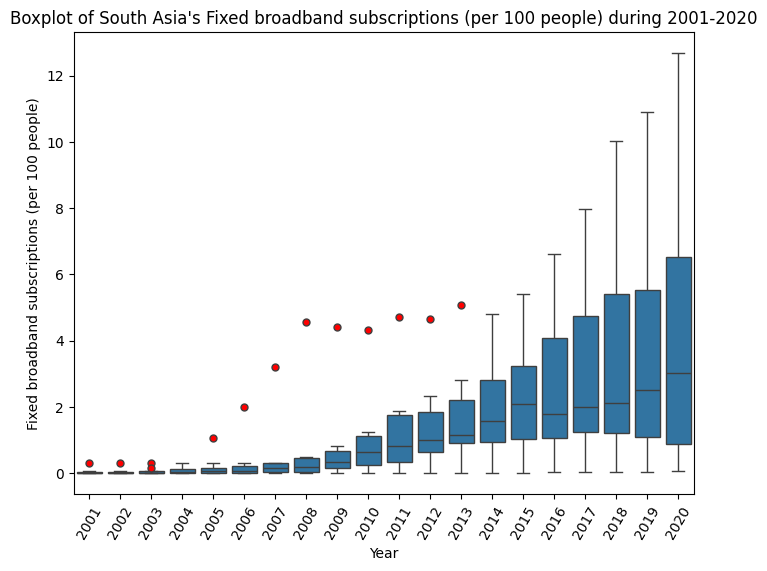

In [189]:
df_internet = df_internet.melt(id_vars=["Year"], var_name="Country", value_name=val1)

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_internet[val1], x=df_internet["Year"],
            showfliers=True,
            flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5})

# ตั้งชื่อกราฟ
plt.ylabel(val1)
plt.xlabel("Year")
plt.title(f"Boxplot of {region}'s {val1} during 2001-2020")
plt.xticks(rotation=60)

# แสดงกราฟ
plt.show()

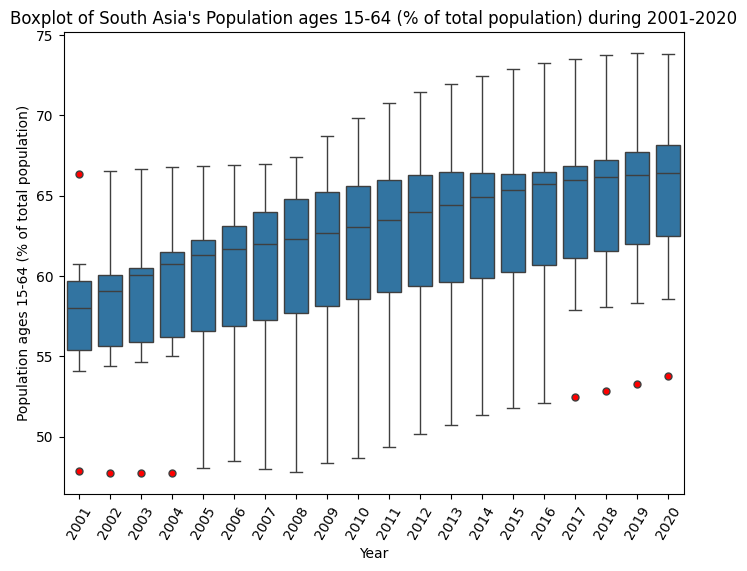

In [190]:
df_work = df_work.melt(id_vars=["Year"], var_name="Country", value_name=val2)

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_work[val2], x=df_internet["Year"],
            showfliers=True,
            flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5})

# ตั้งชื่อกราฟ
plt.ylabel(val2)
plt.xlabel("Year")
plt.title(f"Boxplot of {region}'s {val2} during 2001-2020")
plt.xticks(rotation=60)

# แสดงกราฟ
plt.show()

### Trends

In [191]:
def show_trend(df,Title):
    plt.plot(df["Year"], df["Mean"], label="Mean", marker="o", linestyle="-", color="blue")
    plt.plot(df["Year"], df["Median"], label="Median", marker="s", linestyle="--", color="orange")
    plt.plot(df["Year"], df["Std Dev"], label="Std Dev", marker="^", linestyle="-.", color="green")
    plt.title(f"Trend of {region}'s {Title}")
    plt.xticks(ticks=df["Year"], labels=df["Year"], rotation=60)
    plt.legend(fontsize=10, loc='best', ncol=3)
    plt.grid(True)
    plt.show()

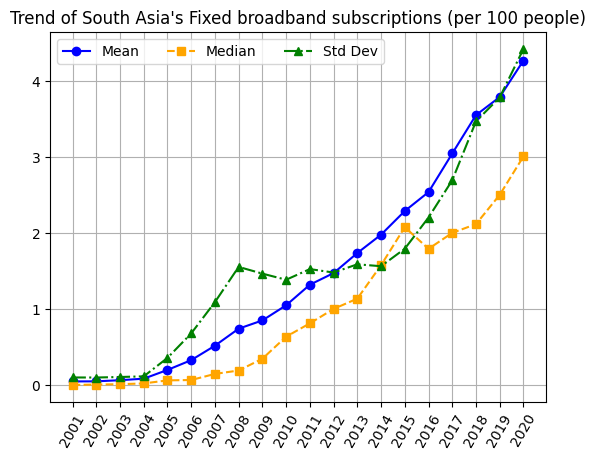

In [192]:
show_trend(df_internet_region, val1)

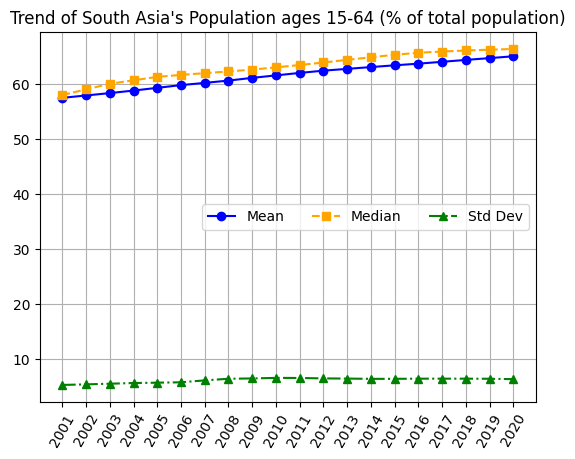

In [193]:
show_trend(df_work_region, val2)

### Correlation

In [194]:
def show_scatterplot(df1, df2, opt):
    # รวมข้อมูลเข้าด้วยกัน (Merge ตาม Country และ Year)
    df_merged = df1.merge(df2, on=["Year", "Country"])

    # เลือกเฉพาะคอลัมน์ที่ต้องการ และเรียงลำดับปีใหม่ให้อยู่ข้างหน้า
    df_selected = df_merged[[opt, val1, val2]]

    # สร้าง Scatter Plot
    plt.figure(figsize=(10, 6))

    if opt == "Year":
        p = "viridis"
    elif opt == "Country":
        p = "tab10"

    sns.scatterplot(
        x=df_selected[val2], 
        y=df_selected[val1],
        hue=df_selected[opt],  # ให้สีแยกตามปี
        palette=p,
        s=80, alpha=0.7  # ขนาดจุดและความโปร่งใส
    )

    # ตั้งชื่อกราฟ
    plt.xlabel(val2)
    plt.ylabel(val1)
    plt.title(f"Scatter Plot of {val2} vs {val1} in {region} by {opt}")

    # แสดง Legend นอกกราฟ
    plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')

    # แสดงกราฟ
    plt.show()

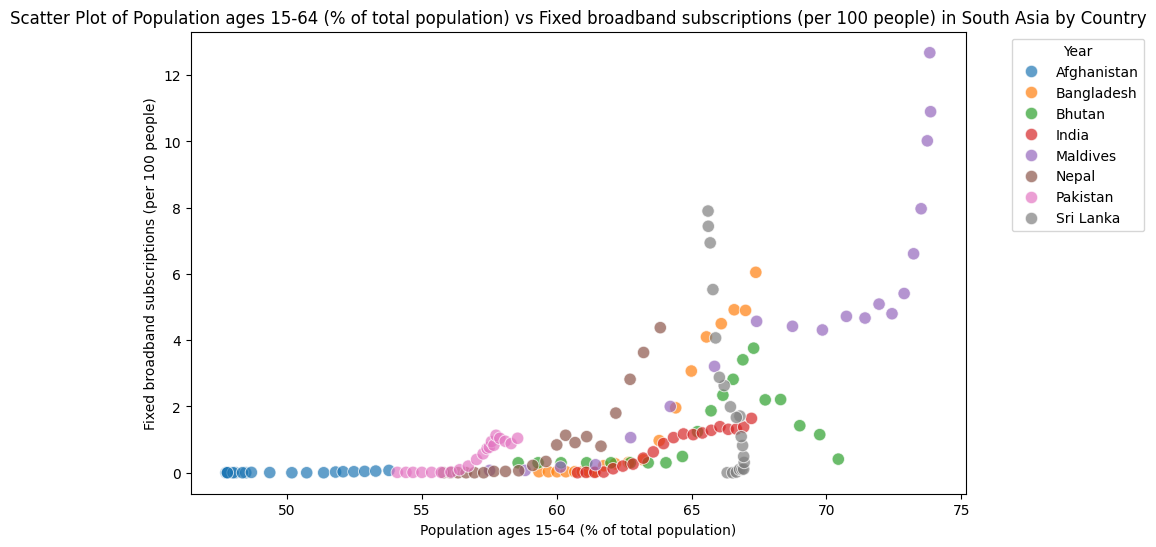

In [195]:
show_scatterplot(df_work, df_internet, "Country")

In [196]:
df_merged = df_internet.merge(df_work, on=["Year", "Country"])
#df_merged.head(5)

In [197]:
def calculate_correlation(df, method="overall"):
    if method == "overall":
        correlation = df[[val2, val1]].corr()
        return correlation

    elif method == "by_year":
        correlation_by_year = df.groupby("Year")[[val2, val1]].corr().unstack().iloc[:, 1]
        return correlation_by_year

    elif method == "by_country":
        correlation_by_country = df.groupby("Country")[[val2, val1]].corr().unstack().iloc[:, 1]
        return correlation_by_country

    else:
        raise ValueError("Invalid method. Choose 'overall', 'by_year', or 'by_country'.")

In [198]:
'''# 1️⃣ Correlation ทั้ง Dataset
overall_corr = calculate_correlation(df_merged, "overall")
print("Overall Correlation:")
print(overall_corr)'''

'''# 2️⃣ Correlation รายปี
yearly_corr = calculate_correlation(df_merged, "by_year")
print("\nYearly Correlation:")
print(yearly_corr)'''

# 3️⃣ Correlation รายประเทศ
country_corr = calculate_correlation(df_merged, "by_country")
print("\nCountry-wise Correlation:")
print(country_corr)


Country-wise Correlation:
Country
Afghanistan    0.850732
Bangladesh     0.932111
Bhutan         0.562670
India          0.975665
Maldives       0.871167
Nepal          0.868564
Pakistan       0.901884
Sri Lanka     -0.903417
Name: (Population ages 15-64 (% of total population), Fixed broadband subscriptions (per 100 people)), dtype: float64


### Distribution

In [199]:
def distribution_by_country(df, val):
    df["Country"] = df["Country"].astype(str)

    # 🔹 สร้าง KDE Plot
    plt.figure(figsize=(12, 6))
    ax = sns.kdeplot(
        data=df, 
        x=val, 
        hue="Country", 
        palette="tab10",  # 🔹 ใช้ tab10 เพื่อให้สีไม่ซ้ำกัน
        fill=True, 
        alpha=0.6
    )

    # ตั้งชื่อกราฟ
    plt.xlabel(val)
    plt.ylabel("Density")
    plt.title(f"Distribution of {val} by Country")

    # 🔹 ตรวจสอบว่า Legend ถูกสร้างขึ้นหรือไม่
    if ax.get_legend() is None:
        plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        handles, labels = ax.get_legend_handles_labels()
        if labels:  # ถ้ามี labels ให้ update legend
            plt.legend(handles, labels, title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

    # แสดงกราฟ
    plt.show()

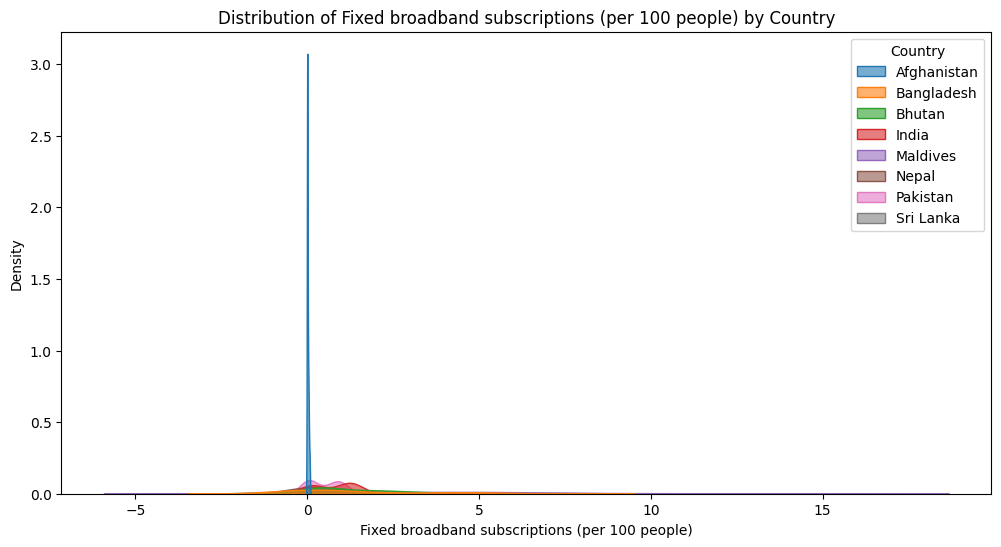

In [200]:
distribution_by_country(df_internet, val1)
#distribution_by_country(df_work, val2)

In [201]:
def distribution_by_year(df, val):
    # 🔹 แปลงให้คอลัมน์ "Year" เป็น string เพื่อใช้เป็น hue
    df["Year"] = df["Year"].astype(str)

    # 🔹 สร้าง KDE Plot
    plt.figure(figsize=(12, 6))
    ax = sns.kdeplot(
        data=df, 
        x=val, 
        hue="Year", 
        palette="coolwarm",  # 🔹 ใช้ coolwarm เพื่อให้แยกสีตามปีชัดเจน
        fill=True, 
        alpha=0.5
    )

    # ตั้งชื่อกราฟ
    plt.xlabel(val)
    plt.ylabel("Density")
    plt.title(f"Distribution of {val} by Year")

    # 🔹 ตรวจสอบว่า Legend ถูกสร้างขึ้นหรือไม่
    if ax.get_legend() is None:
        plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        handles, labels = ax.get_legend_handles_labels()
        if labels:  # ถ้ามี labels ให้ update legend
            plt.legend(handles, labels, title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')

    # แสดงกราฟ
    plt.show()

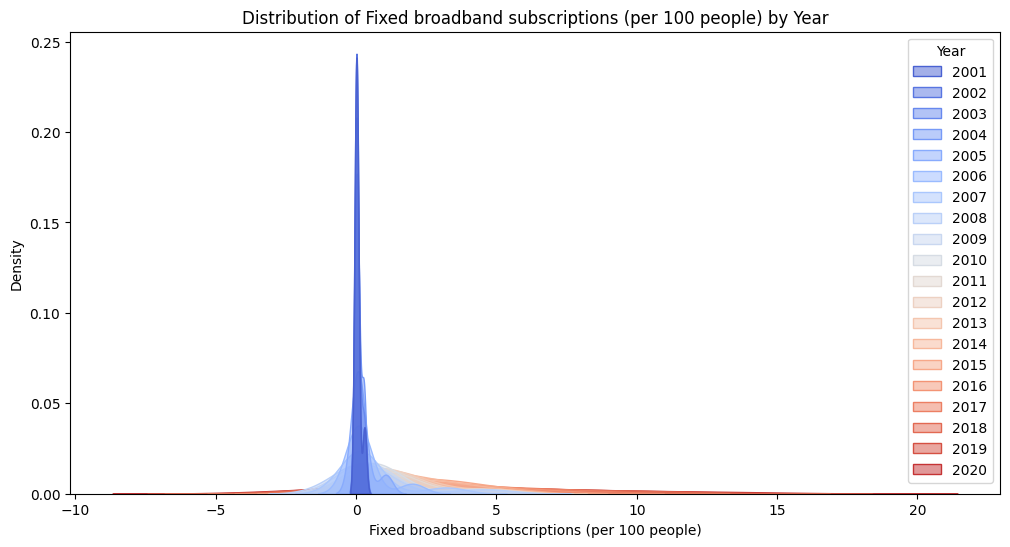

In [202]:
distribution_by_year(df_internet, val1)
#distribution_by_year(df_work, val2)

## Anova

### Remove Outlier

In [203]:
from scipy.stats import zscore

df_internet = df_internet_ori
df_work = df_work_ori

def remove_outliers(df, z_threshold=3.0, impute_with="median"):
    # 1) แปลงเป็น Long Format
    df_melted = df.melt(id_vars=["Year"], var_name="Country", value_name="Value")
    
    # 2) groupby แค่ Year เพื่อหาค่า Q1, Q3
    iqr_stats = df_melted.groupby("Year")["Value"].agg(
        Q1=lambda x: x.quantile(0.2),
        Q3=lambda x: x.quantile(0.8),
        median="median"   # เก็บ median ไว้ด้วย
    ).reset_index()
    
    # 3) คำนวณ IQR กับ Boundaries
    iqr_stats["IQR"] = iqr_stats["Q3"] - iqr_stats["Q1"]
    iqr_stats["Lower_Bound"] = iqr_stats["Q1"] - 1.5 * iqr_stats["IQR"]
    iqr_stats["Upper_Bound"] = iqr_stats["Q3"] + 1.5 * iqr_stats["IQR"]
    
    # 4) Merge เพื่อนำค่าพวกนี้ไปใช้
    df_merged = df_melted.merge(iqr_stats, on="Year", how="left")
    
    # 5) แทนที่ Outlier ด้วย median ของปีนั้น
    is_outlier = (df_merged["Value"] < df_merged["Lower_Bound"]) | (df_merged["Value"] > df_merged["Upper_Bound"])
    
    df_merged.loc[is_outlier, "Value"] = df_merged.loc[is_outlier, "median"]
    
    # 6) Pivot กลับเป็น Wide Format
    df_cleaned = df_merged.pivot(index="Year", columns="Country", values="Value").reset_index()
    
    return df_cleaned

df_internet = remove_outliers(df_internet)
df_work = remove_outliers(df_work)

In [204]:
# Before remove outlier
df_internet_ori.head(20)
#df_work_ori.head(20)

,Year,Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka
0,2001,0.000,0.03,0.30,0.00,0.07,0.00,0.01,0.00
1,2002,0.000,0.03,0.30,0.01,0.07,0.00,0.01,0.00
2,2003,0.000,0.03,0.30,0.01,0.17,0.00,0.01,0.02
3,2004,0.000,0.03,0.30,0.02,0.24,0.00,0.01,0.10
4,2005,0.000,0.03,0.30,0.12,1.06,0.00,0.01,0.10
5,2006,0.000,0.03,0.30,0.20,2.00,0.00,0.01,0.11
6,2007,0.000,0.03,0.30,0.26,3.21,0.04,0.02,0.31
7,2008,0.000,0.03,0.30,0.44,4.57,0.04,0.09,0.49
8,2009,0.000,0.21,0.49,0.63,4.42,0.06,0.20,0.82
9,2010,0.010,0.27,1.24,0.88,4.31,0.22,0.40,1.09


In [205]:
# After remove outlier
#df_internet.head(20)
df_work.head(20)

Country,Year,Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka
0,2001,47.85,59.34,58.57,60.77,57.51,55.80,54.09,66.32
1,2002,47.77,59.69,59.31,61.09,58.83,56.06,54.41,66.52
2,2003,47.74,60.01,60.16,61.41,60.14,56.34,54.67,66.66
3,2004,47.78,60.34,61.11,61.74,61.44,56.64,55.00,66.78
4,2005,48.09,60.67,62.01,62.09,62.74,56.95,55.36,66.87
5,2006,48.47,60.95,62.73,62.45,64.21,57.29,55.72,66.93
6,2007,48.00,61.20,63.39,62.83,65.85,57.67,56.08,66.95
7,2008,47.79,61.44,64.05,63.21,67.41,58.10,56.40,66.93
8,2009,48.35,61.74,64.66,63.58,68.74,58.59,56.72,66.89
9,2010,48.68,62.17,65.22,63.96,69.85,59.11,57.03,66.84


In [206]:
df_internet = df_internet.melt(id_vars=["Year"], var_name="Country", value_name="val")
df_internet.index = df_internet["Year"]
df_internet.drop(columns=["Year"], inplace=True)

df_work = df_work.melt(id_vars=["Year"], var_name="Country", value_name="val")
df_work.index = df_work["Year"]
df_work.drop(columns=["Year"], inplace=True)

In [207]:
df_internet

,Country,val
Year,,
2001,Afghanistan,0.00
2002,Afghanistan,0.00
2003,Afghanistan,0.00
2004,Afghanistan,0.00
2005,Afghanistan,0.00
...,...,...
2016,Sri Lanka,4.07
2017,Sri Lanka,5.53
2018,Sri Lanka,6.94


In [208]:
'''
df_internet.drop(columns=["Year"], inplace=True)
df_work.drop(columns=["Year"], inplace=True)
df_internet.rename(columns={val1: "Broadband"}, inplace=True)
df_work.rename(columns={val2 : "Population"}, inplace=True)
df_internet.to_csv(os.path.join(processed_data_path, "internet_r.csv"), index=False)
df_work.to_csv(os.path.join(processed_data_path, "work_r.csv"), index=False)
'''

'\ndf_internet.drop(columns=["Year"], inplace=True)\ndf_work.drop(columns=["Year"], inplace=True)\ndf_internet.rename(columns={val1: "Broadband"}, inplace=True)\ndf_work.rename(columns={val2 : "Population"}, inplace=True)\ndf_internet.to_csv(os.path.join(processed_data_path, "internet_r.csv"), index=False)\ndf_work.to_csv(os.path.join(processed_data_path, "work_r.csv"), index=False)\n'

### Internet

In [209]:
# Convert lab column to categorical
df_internet['Country'] = df_internet['Country'].astype('category')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 2001 to 2020
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Country  160 non-null    category
 1   val      160 non-null    float64 
dtypes: category(1), float64(1)
memory usage: 3.0 KB


In [210]:
# Perform ANOVA
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.api as sm

model = ols('val ~ Country', data=df_internet).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results:")
print(anova_result)

ANOVA Results:
              sum_sq     df         F    PR(>F)
Country   146.387507    7.0  5.024265  0.000038
Residual  632.669679  152.0       NaN       NaN


In [211]:
# Compute the F critical value for 99% confidence level
f_critical = stats.f.ppf(0.99, dfn=7, dfd=152)
print("F critical value:", f_critical)

F critical value: 2.758955615593988


In [212]:
# Compute Tukey's HSD critical value
qtukey_val = stats.tukeylambda.ppf(0.01, 1)
print("qTukey value:", qtukey_val)

qTukey value: -0.98


In [213]:
# Extract Residual Sum of Squares (SS_residual) and Residual Degrees of Freedom (DF_residual)
ss_residual = anova_result.loc['Residual', 'sum_sq']
df_residual = anova_result.loc['Residual', 'df']

# Compute Mean Squared Error (MSE)
print("SS_residual:", ss_residual)
print("DF_residual:", df_residual)
mse = ss_residual / df_residual
print("Computed MSE:", mse)

SS_residual: 632.66967875
DF_residual: 152.0
Computed MSE: 4.162300518092105


In [214]:
# find group sizes
group_sizes = df_internet.groupby('Country').size()
n_harmonic = len(group_sizes) / np.sum(1 / group_sizes)
n_harmonic

C:\Users\nadda\AppData\Local\Temp\ipykernel_47244\2464023194.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df_internet.groupby('Country').size()


20.0

In [215]:
w_value = qtukey_val * np.sqrt(mse / n_harmonic)
print("w value:", w_value)

w value: -0.44707233293817555


In [216]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD test using statsmodels
tukey = pairwise_tukeyhsd(df_internet['val'], df_internet['Country'], alpha=0.01)
print("\nTukey HSD Results:")
print(tukey)


Tukey HSD Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.01     
   group1     group2   meandiff p-adj   lower   upper  reject
-------------------------------------------------------------
Afghanistan Bangladesh   1.5817 0.2246 -0.7402  3.9037  False
Afghanistan     Bhutan   1.2297 0.5489 -1.0922  3.5517  False
Afghanistan      India   0.7608 0.9367 -1.5612  3.0827  False
Afghanistan   Maldives   3.1558 0.0001  0.8338  5.4777   True
Afghanistan      Nepal   0.8922 0.8637 -1.4297  3.2142  False
Afghanistan   Pakistan   0.4697  0.996 -1.8522  2.7917  False
Afghanistan  Sri Lanka   2.2772 0.0126 -0.0447  4.5992  False
 Bangladesh     Bhutan   -0.352 0.9994 -2.6739  1.9699  False
 Bangladesh      India   -0.821 0.9076 -3.1429  1.5009  False
 Bangladesh   Maldives    1.574 0.2301 -0.7479  3.8959  False
 Bangladesh      Nepal  -0.6895 0.9623 -3.0114  1.6324  False
 Bangladesh   Pakistan   -1.112 0.6719 -3.4339  1.2099  False
 Bangladesh  Sri Lanka   0.6955 0.9605 -1.6264  3.

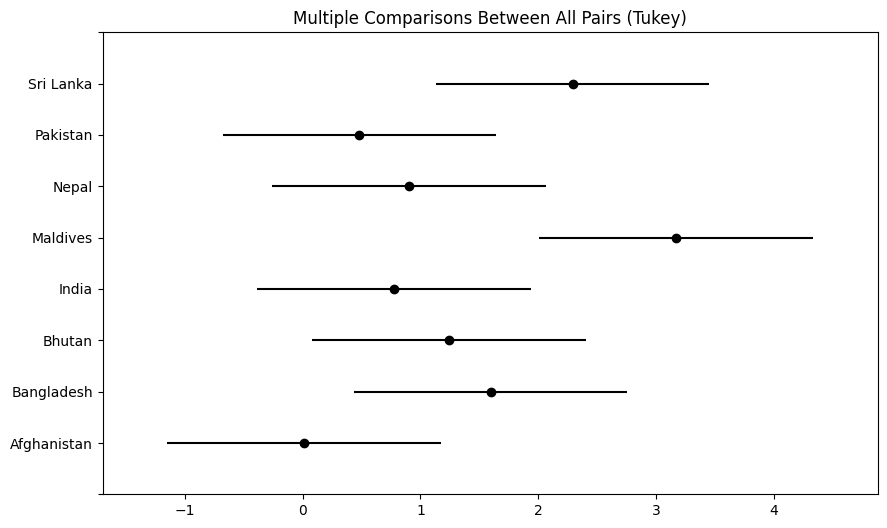

In [217]:
# Plot Tukey HSD results
tukey.plot_simultaneous()
plt.show()

### Working Age Population

In [ ]:
# Convert lab column to categorical
df_work['Country'] = df_work['Country'].astype('category')
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 2001 to 2020
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Country  160 non-null    category
 1   val      160 non-null    float64 
dtypes: category(1), float64(1)
memory usage: 3.0 KB


In [ ]:
# Perform ANOVA
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.api as sm

model = ols('val ~ Country', data=df_work).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results:")
print(anova_result)

ANOVA Results:
               sum_sq     df          F        PR(>F)
Country   5034.365549    7.0  85.648475  1.626151e-49
Residual  1276.352585  152.0        NaN           NaN


In [220]:
# Compute the F critical value for 99% confidence level
f_critical = stats.f.ppf(0.99, dfn=7, dfd=152)
print("F critical value:", f_critical)

F critical value: 2.758955615593988


In [ ]:
# Compute Tukey's HSD critical value
qtukey_val = stats.tukeylambda.ppf(0.01, 1)
print("qTukey value:", qtukey_val)

qTukey value: -0.98


In [222]:
# Extract Residual Sum of Squares (SS_residual) and Residual Degrees of Freedom (DF_residual)
ss_residual = anova_result.loc['Residual', 'sum_sq']
df_residual = anova_result.loc['Residual', 'df']

# Compute Mean Squared Error (MSE)
print("SS_residual:", ss_residual)
print("DF_residual:", df_residual)
mse = ss_residual / df_residual
print("Computed MSE:", mse)

SS_residual: 1276.352585
DF_residual: 152.0
Computed MSE: 8.397056480263158


In [223]:
# find group sizes
group_sizes = df_work.groupby('Country').size()
n_harmonic = len(group_sizes) / np.sum(1 / group_sizes)
n_harmonic

C:\Users\nadda\AppData\Local\Temp\ipykernel_47244\2099065447.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df_work.groupby('Country').size()


20.0

In [224]:
w_value = qtukey_val * np.sqrt(mse / n_harmonic)
print("w value:", w_value)

w value: -0.6350013009295625


In [225]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD test using statsmodels
tukey = pairwise_tukeyhsd(df_work['val'], df_work['Country'], alpha=0.01)
print("\nTukey HSD Results:")
print(tukey)


Tukey HSD Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.01      
   group1     group2   meandiff p-adj   lower    upper  reject
--------------------------------------------------------------
Afghanistan Bangladesh  13.0385    0.0   9.7405 16.3365   True
Afghanistan     Bhutan    15.03    0.0   11.732  18.328   True
Afghanistan      India  14.1555    0.0  10.8575 17.4535   True
Afghanistan   Maldives   18.293    0.0   14.995  21.591   True
Afghanistan      Nepal    9.471    0.0    6.173  12.769   True
Afghanistan   Pakistan   6.7525    0.0   3.4545 10.0505   True
Afghanistan  Sri Lanka   16.498    0.0     13.2  19.796   True
 Bangladesh     Bhutan   1.9915 0.3738  -1.3065  5.2895  False
 Bangladesh      India    1.117 0.9252   -2.181   4.415  False
 Bangladesh   Maldives   5.2545    0.0   1.9565  8.5525   True
 Bangladesh      Nepal  -3.5675 0.0036  -6.8655 -0.2695   True
 Bangladesh   Pakistan   -6.286    0.0   -9.584  -2.988   True
 Bangladesh  Sri Lanka   3.4595 0.0

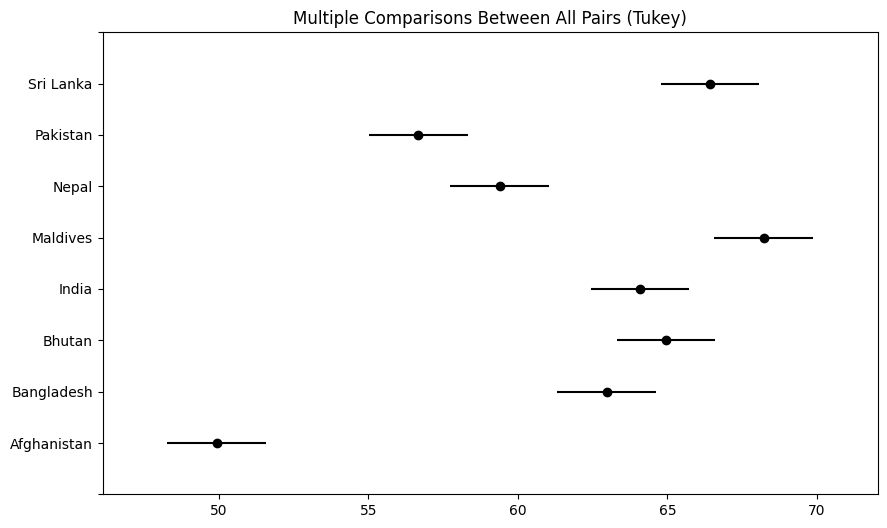

In [226]:
# Plot Tukey HSD results
tukey.plot_simultaneous()
plt.show()